In [110]:
#importing the important libraries for use in the networks 
import networkx as nx
import pandas as pd
import numpy as np
import math 

import matplotlib.pyplot as plt
from numpy import array
import sys

import warnings

warnings.filterwarnings("ignore")

print('Python Version : '+sys.version)
print('NetworkX version : '+nx.__version__)

%matplotlib inline
from scipy.sparse import csr_matrix
import numpy as np
import scipy.linalg as lg
import networkx as nx
import matplotlib.pyplot as plt
import scipy.special
%matplotlib inline
from sklearn.cluster import SpectralClustering
from sklearn import metrics
np.random.seed(1)

Python Version : 3.9.2 (default, Feb 28 2021, 17:03:44) 
[GCC 10.2.1 20210110]
NetworkX version : 2.5


## Inputing\loading data set

The dataset is seventh grader dataset of students from Victoria, this data set is directed graph. 

It has information about 29 seventh grade students who were asked about their favorite partner for three activities.

Each student will be represented as node 


In [111]:

#GH=nx.read_weighted_edgelist('Grade7th.txt',create_using=nx.DiGraph)#IMporting for undirected graph


In [112]:
#A=nx.to_numpy_matrix(H)
#H=nx.from_numpy_matrix(A,create_using=nx.DiGraph) # to get labelling correct, best to create graph frm adjacency matrix

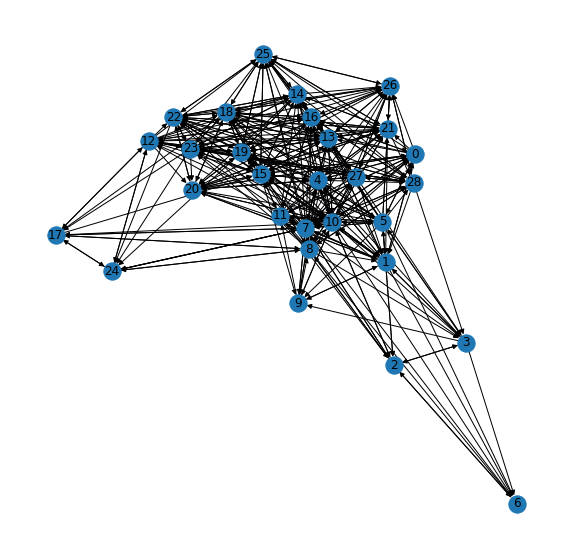

In [113]:
#Create a graph
#H=nx.read_weighted_edgelist('Grade7th.txt',create_using=nx.DiGraph) #Importing for directed graph
#nx.draw_networkx(H)
#plt.figure(3,figsize=(6,6))
#nx.draw(H, with_labels=True, node_color="lime", font_color="red")

H=nx.read_weighted_edgelist('Grade7th.txt',create_using=nx.DiGraph) #Importing for directed graph
plt.figure(3,figsize=(10,10))
nx.draw_networkx(H)
plt.axis('off')
plt.show()

In [114]:
H.edges
H.number_of_edges()

376

In [116]:
#Connections of nodes via edges 
H.edges()
H.number_of_edges()

376



Need to compute $(W_{M} )_{ij}$, where $(W_{M} )_{ij}$ = number of motif instances in M where i and j participate in the motif.

The below table represent the list of formula of $W_M$ for 7 directed triangle motifs in term of matrix computations involving $U$ and $B$

let $A$ be the adjacency matrix of the original graph

let $U$ be the adjacency matrix of the undirectional links of G

let $B$ be the adjacency matrix of the bidirectional links of G

Formally, $B = A◦A^T$ and $U = A-B$, where ◦ denotes the Hadamard



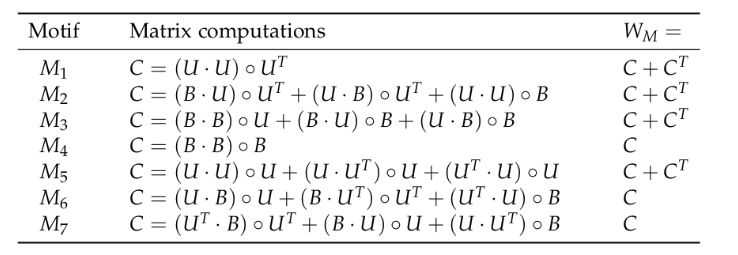

In [117]:
#adjacency matrix of the original graph
A = nx.to_numpy_matrix(H)


In [118]:
#let start with 𝐵 = A◦A.T be the adjacency matrix of the bidirectional links of G
#let start with U = A - B being the adjacency matrix of the unidirectional link of G

#lets find B first
#For B, given A, we can compute a transpose of A as follows:
A1 = A.T  # transpose of (A2)

#Need to find the hadamard of A and A1 (B = A◦A1)
B = np.multiply(A, A1) #the adjacency matrix of the bidirectional links of G


#lets find U first
#For U, given both A and B, we can compute a transpose of A as follows:

U = A - B  # Unidirectional links of G


## Motifs and $W_{M}$ computations

$$C = (U.U◦U_1^T)$$

$$Motif(M_1)\quad W_M = C+C^T$$

In [208]:
#Need to compute for C first, given U, need to find U*U and the trandpose of U, respectively as follows:
a1 = np.matmul(U,U)#Multiplication,
U1 = U.T  # U transpose

#We now need to find the hadamard  multiplication of a1 and U1 as (a1◦𝑈1)
b1 = np.multiply(a1, U1)
#Thus all the above calculations account for C,thus, b1 = C


#We now need to find WM that is C + C transpose
#Since we know C, we now need to find C transpose

C1= b1.T  # U transpose

#Need to compute for W
W1 = b1 + C1

W1


matrix([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

$$C = (B.U)◦U^{T}+(U.B)◦U^{T}+(U.U)◦B$$

$$Motif(M_2)\quad W_M = C+C^T$$

In [210]:
#Need to compute for C first, knowing both B and U, need to find B*U and the trandpose of U as follows:
a2 = np.matmul(B,U)
U2 = U.T  # U transpose

#We now need to find the hadamard  multiplication of a2 and U2 as (a2◦𝑈2)
b2 = np.multiply(a2, U2)#hadamard  multiplication

#We now need to find the multiplaction of U*B, as follows   
a_2 = np.matmul(U,B)
#We calculated U.transpose on line 3, as follows
U2 = U.T  # U transpose
#Need to compute for hadarmd multiplication of (a2*U2)
b_2 = np.multiply(a_2, U2)#hadamard  multiplication

#Need to compute for the multiplication of U*U and this done as follows:   
a_2i = np.matmul(U,U)
#Thus, we now need to compute for the hadamard  multiplication U*U◦B, and this is done as follows
b_2i = np.multiply(a_2i, B)
    
#Compute C2 Now
C2 = b2 + b_2 + b_2i
#C2=b1
    
C_2= C2.T  # U transpose
W2 = C2 + C_2

W2

matrix([[0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 2., 1., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 2., 0., 0.,
         1., 0., 1., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 3., 0., 2., 0., 0., 1., 1., 0.,
         2., 0., 3., 1., 1., 1., 1., 1., 3., 2., 0., 2., 3.],
        [0., 0., 0., 0., 1., 1., 2., 1., 0., 5., 2., 0., 2., 2., 1., 0.,
         2., 0., 2., 1., 1., 4., 1., 5., 2., 3., 4., 2., 2.],
        [0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 2., 1.,
         0., 0., 4., 1., 0., 1., 0., 3., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 1., 2., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 2., 0., 0., 0., 0., 0., 0., 1., 1., 3., 0.],
        [1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.

$$C = (B.B)◦U+(B.U)◦B+(U.B)◦B$$

$$Motif(M_3)\quad W_M = C+C^T$$

In [211]:
#Need to compute for C first, knowing both B and U, need to find B*U and the trandpose of U as follows:
a3 = np.matmul(B,B)
#We now need to find the hadamard  multiplication of a3 and U as (a3◦𝑈)
b3 = np.multiply(a3, U)#hadamard  multiplication

#We now need to find the multiplaction of B*U, as follows   
a_3 = np.matmul(B,U)
#Need to compute for hadarmd multiplication of (a_3*B)
b_3 = np.multiply(a_3, B)#hadamard  multiplication

#Need to compute for the multiplication of U*U and this done as follows:   
a_3i = np.matmul(U,B)
#Thus, we now need to compute for the hadamard  multiplication U*B◦B, and this is done as follows
b_3i = np.multiply(a_3i, B)
    
#Compute C3 Now
C3 = b3 + b_3 + b_3i
#C3=b1
    
C_3= C3.T  # U transpose
W3 = C3 + C_3
W3

matrix([[ 0.,  3.,  3.,  2.,  2.,  6.,  6.,  4.,  3.,  5.,  4.,  1.,  0.,
          2.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.],
        [ 3.,  0.,  4.,  9.,  4.,  3.,  5.,  3.,  0.,  4.,  2.,  0.,  0.,
          6.,  9.,  3.,  4.,  0.,  4.,  1.,  3.,  0.,  0.,  0.,  1.,  0.,
          0.,  0.,  0.],
        [ 3.,  4.,  0.,  9.,  7.,  3.,  5.,  5.,  0.,  4.,  2.,  0.,  2.,
          9.,  8.,  6.,  3.,  1.,  2.,  2.,  3.,  5.,  1.,  8., 10.,  2.,
          3.,  3.,  2.],
        [ 2.,  9.,  9.,  0.,  6., 10.,  8.,  7.,  6.,  4., 10.,  4.,  3.,
          4.,  3.,  6.,  3.,  1.,  3.,  5., 10.,  2.,  5.,  3.,  2.,  4.,
          3.,  2.,  4.],
        [ 2.,  4.,  7.,  6.,  0.,  3.,  7.,  4.,  0.,  0.,  2.,  0.,  0.,
          5.,  5.,  2.,  0.,  0.,  2.,  1.,  0.,  0.,  0.,  2.,  0.,  0.,
          0.,  0.,  0.],
        [ 6.,  3.,  3., 10.,  3.,  0.,  2.,  6.,  3.,  4.,  2.,  3.,  7.,
          6.,  6.,  0.,  0.,  0.,  0.,  5.,  1.,  0.,  3.,  0

$$C = (B.B)◦B$$

$$Motif(M_4)\quad W_M = C$$

In [212]:
#Need to compute for C first, knowing both B and U, need to find B*U and the trandpose of U as follows:
a4 = np.matmul(B,B)
#We now need to find the hadamard  multiplication of a3 and B as (a4◦B)
b4 = np.multiply(a4, B)#hadamard  multiplication

#b4=C
    
W4 = b4
W4

matrix([[ 0.,  5.,  5.,  8.,  5.,  0.,  6.,  3.,  0.,  4.,  0.,  0.,  0.,
          6.,  6.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.],
        [ 5.,  0.,  5.,  5.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          5.,  4.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.],
        [ 5.,  5.,  0.,  8.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          5.,  6.,  1.,  0.,  0.,  3.,  0.,  0.,  0.,  0.,  2.,  1.,  0.,
          0.,  1.,  2.],
        [ 8.,  5.,  8.,  0.,  5.,  7.,  9.,  4.,  0.,  7.,  5.,  0.,  0.,
          9., 10.,  1.,  0.,  0.,  3.,  0.,  6.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  1.],
        [ 5.,  3.,  3.,  5.,  0.,  0.,  3.,  3.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.],
        [ 0.,  0.,  0.,  7.,  0.,  0., 12.,  4., 10.,  8., 10.,  7.,  4.,
          5.,  7.,  0.,  0.,  0.,  0.,  8., 12.,  0.,  8.,  0

$$C = (U.U)◦U+(U.U^{T})◦U+(U^{T}.U)◦U$$

$$Motif(M_5)\quad W_M = C+C^T$$

In [213]:
#Need to compute for a5, i.e U*U as follows:
a5 = np.matmul(U,U)
#We now need to find the hadamard  multiplication of a5 and U as (a5◦𝑈)
b5 = np.multiply(a5, U)#hadamard  multiplication

#We now need to find the multiplaction of U*UT, Thus we start by finding the UT that is transpose of U 
U5 = U.T  # U transpose
#We now need to find the multiplaction of U*UT as follows:
a_5 = np.matmul(U,U5)
#Need to compute for hadarmd multiplication of (a_5*U)
b_5 = np.multiply(a_5, U)#hadamard  multiplication

#Need to compute for the multiplication of UT*U and this done as follows:   
a_5i = np.matmul(U5,U)
#Thus, we now need to compute for the hadamard  multiplication UT*U◦U, and this is done as follows
b_5i = np.multiply(a_5i, U)
    
#Compute C2 Now
C5 = b5 + b_5 + b_5i
#C5=b1
    
C_5= C5.T  # U transpose
W5 = C5 + C_5
W5


matrix([[0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 3., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 3., 1., 3., 2., 3., 5., 0., 0., 0.,
         0., 0., 1., 4., 0., 0., 1., 0., 4., 4., 0., 0., 0.],
        [0., 0., 0., 0., 0., 2., 2., 4., 2., 4., 2., 4., 6., 0., 0., 0.,
         2., 2., 0., 4., 0., 9., 3., 0., 0., 5., 9., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 5., 0., 0., 5., 4., 0., 0., 0.,
         4., 2., 0., 3., 0., 6., 4., 5., 4., 4., 6., 2., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 5., 0., 1.,
         0., 0., 1., 1., 0., 3., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 2., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 3., 0., 0., 0., 0., 1., 0., 0.],
        [0., 1., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.],
        [0., 3., 4., 0., 0., 0., 0., 0., 0., 0., 0., 3.

$$C = (U.B)◦U+(B.U^{T})◦U^{T}+(U^{T}.U)◦B$$

$$Motif(M_6)\quad W_M = C$$

In [214]:
#Need to compute for a6, i.e U*B as follows:
a6 = np.matmul(U,B)
#We now need to find the hadamard  multiplication of a6 and U as (a6◦𝑈)
b6 = np.multiply(a6, U)#hadamard  multiplication

#We now need to find the multiplaction of U*UT, Thus we start by finding the UT that is transpose of U 
U6 = U.T  # U transpose
#We now need to find the multiplaction of U*UT as follows:
a_6 = np.matmul(B,U6)
#Need to compute for hadarmd multiplication of (a_6*U6)
b_6 = np.multiply(a_6, U6)#hadamard  multiplication

#Need to compute for the multiplication of UT*U and this done as follows:   
a_6i = np.matmul(U6,U)
#Thus, we now need to compute for the hadamard  multiplication UT*U◦B, and this is done as follows
b_6i = np.multiply(a_6i, B)
    
#Compute C2 Now
C6 = b6 + b_6 + b_6i
#C6=b1
    

W6 = C6 

W6

matrix([[ 0.,  0.,  1.,  1.,  1.,  4.,  1.,  1.,  4.,  0.,  4.,  4.,  4.,
          1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  6.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0., 11., 10.,  5., 11.,  6.,  9.,  8.,  6.,
          0.,  0.,  1.,  0.,  1.,  0.,  8., 10.,  0., 10.,  0.,  4.,  8.,
          0.,  0.,  0.],
        [ 1.,  0.,  0.,  1.,  1., 11., 10.,  5., 11.,  6.,  9.,  8.,  5.,
          1.,  0.,  0.,  0.,  0.,  0.,  8., 11.,  4.,  9.,  0.,  0.,  8.,
          3.,  0.,  0.],
        [ 1.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  5.,  0.,  0.,  4.,  4.,
          1.,  0.,  0.,  0.,  0.,  0.,  5.,  0.,  7.,  5.,  4.,  5.,  6.,
          3.,  1.,  0.],
        [ 1.,  0.,  1.,  1.,  0.,  4.,  1.,  1.,  0.,  0.,  3.,  0.,  0.,
          2.,  4.,  0.,  0.,  0.,  0.,  3.,  0.,  5.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.],
        [ 4., 11., 11.,  1.,  4.,  0.,  4.,  3.,  5.,  3.,  5.,  5.,  4.,
          2.,  1.,  0.,  0.,  0.,  0.,  4.,  2.,  8.,  4.,  0

$$C = (U^{T}.B)◦U^{T}+(B.U)◦U+(U.U^{T})◦B$$

$$Motif(M_7)\quad W_M = C$$

In [215]:
#We now need to find the multiplaction of UT*B, Thus we start by finding the UT that is transpose of U 
U7 = U.T  # U transpose
a7 = np.matmul(U7,B)
#We now need to find the hadamard  multiplication of a7 and UT as (aT◦𝑈T)
b7 = np.multiply(a7, U7)#hadamard  multiplication

#We now need to find the multiplaction of B*U 
a_7 = np.matmul(B,U)
#We now need to find the multiplaction of a7 and U as (a7◦𝑈) as follows:
b_7 = np.multiply(a_7, U)#hadamard  multiplication

#Need to compute for the multiplication of U*UT and this done as follows:   
a_7i = np.matmul(U,U7)
#Thus, we now need to compute for the hadamard  multiplication U*UT◦B, and this is done as follows
b_7i = np.multiply(a_7i, B)
    
#Compute C7 Now
C7 = b7 + b_7 + b_7i
#C6=b1
    
W7 = C7
W7

matrix([[ 0.,  5.,  5.,  3.,  2.,  3.,  0.,  1.,  5.,  0.,  3.,  4.,  4.,
          1.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.],
        [ 5.,  0., 13.,  8.,  4.,  3.,  1.,  1.,  5.,  1.,  3.,  3.,  4.,
          4.,  4.,  2.,  2.,  4.,  1.,  4.,  1.,  0.,  3.,  0.,  2.,  2.,
          0.,  0.,  0.],
        [ 5., 13.,  0.,  9.,  3.,  3.,  2.,  1.,  5.,  2.,  3.,  5.,  4.,
          3.,  3.,  0.,  3.,  3.,  0.,  4.,  2.,  0.,  4.,  6.,  2.,  2.,
          2.,  1.,  0.],
        [ 3.,  8.,  9.,  0.,  1.,  0.,  0.,  2.,  5.,  0.,  1.,  4.,  4.,
          3.,  4.,  0.,  1.,  3.,  0.,  5.,  0.,  0.,  3.,  0.,  3.,  2.,
          1.,  0.,  0.],
        [ 2.,  4.,  3.,  1.,  0.,  3.,  0.,  1.,  0.,  0.,  3.,  0.,  0.,
          0.,  0.,  1.,  0.,  0.,  0.,  4.,  0.,  1.,  0.,  1.,  0.,  0.,
          0.,  0.,  0.],
        [ 3.,  3.,  3.,  0.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

 Motif adjacency matrix is defined by:

$(W_{M})_{ij}$ = number of motif instances in $M$ where $i$ and $j$ participate in the motif. 
Or, formally,

$$(W_{M})_{ij}= \sum_{(v,\chi,A(v))\in M} 1(\{i,j\} \subset \chi A(v)) $$

for $i \neq j$, Note that weight is added to $(W_{M})_{ij}$ only $i$ and $j$ appear in the anchor set. This is important specifically for the transportation reachability network, where weight is added between cities $i$ and $j$ based on the number of intermediary cities that can be traversed between them.

Thus, $(W_{M})_{ij}$ count the co-occurrences of the motif pattern between i,j. e.g $M_3$, $(W_{M})_{ij}$ will count the number of triangle that edges participate in.

Now, we define the motif diagonal degree matrix by $(D_{M})_{ij}= \sum_{j=1}^{n}(W_{M})_{ij}$ and the motif Laplacian as  $L_{M} = D_{M}-W_{M}$. 

Finaly, the normalised motif Laplacian  $N_{M} = D_{M}^{-1/2}L_{M}D_{M}^{-1/2}$....or = $I - D_{M}^{-1/2}W_{M}D_{M}^{-1/2}$

$D = diag(A1)$ ....(Diagonal degree matrix (1 is the vector of all ones)) and A is replaced by W in case


In [126]:

# e is our vector of 1
e = np.ones((29,1), dtype=int)
#Need to find the degree
D=C1*e




In [127]:
#Need to find the outdegrees
#D=A.e = #D=A.e
np.dot(A,np.ones(29))

matrix([[14., 23., 27., 27., 12., 14., 16., 12., 14., 10., 13.,  8.,  9.,
         15., 17.,  5.,  6.,  1.,  6., 13., 15., 19., 12., 16., 11., 16.,
         15.,  5.,  5.]])

In [128]:
#Need to find the indegrees
#D=A.e = #K=W.e
np.dot(np.ones(29),A)

matrix([[10.,  7., 13., 16.,  9., 20., 20., 14., 19., 17., 17., 18., 16.,
         16., 15.,  8.,  8.,  7.,  7., 17., 17.,  6., 17., 10., 14., 14.,
          9.,  7.,  8.]])

In [129]:
#Determining the diagonal matrix of the degree...D=diag(K):
Di =np.diag(np.ravel(np.sum(C2,axis=1)))  


#Need to compute for Laplacian Matrix

Take anyone of the computed MAMs $(M_{1}, M_{2},...,M_{7}$). Let's call it W.
Then D = W*e (where e is a vector of ones) and normalised Laplacian is  $𝑁_{𝑀}=𝐷^{−1/2}_{𝑀}𝐿_{𝑀}𝐷^{−1/2}_{𝑀}....or = 𝐼−𝐷^{-1/2}𝑊_{𝑀}𝐷^{−1/2}_{𝑀}$.  Or you can just use the Laplacian $L = D - W$. In any case, use the Fiedler vector to split the network into 2.

In [130]:
#Computing laplacian matrix
L = Di - C2


In [131]:
#THis code check if W is symmetric 
# creating numpy array
a = np.array(W4)
# Transpose of given Array
b = a.T
# Comparing both arrays using array_equal() method
if np.array_equal(a, b):
    print("The array is Symmetric")
else:
    print("The array is Not Symmetric")

The array is Symmetric


## Plotting a graph that is associated with the MAMs using W1..W7 as adjacency matrices

In [132]:
#HG=nx.read_weighted_edgelist('Grade7th.txt')
#H=nx.read_weighted_edgelist('Karate.txt',create_using=nx.DiGraph) 
#Creating a network graph
#plt.figure(3,figsize=(6,6))
#nx.draw_networkx(HG)
#plt.axis('off')
#plt.show()

<Figure size 432x288 with 0 Axes>

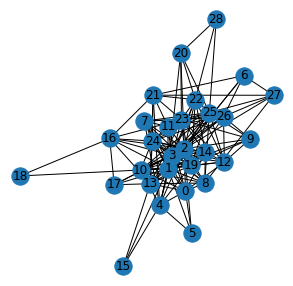

In [433]:
        
#plt.clf()
Gr=nx.from_numpy_matrix(W7)
plt.clf()
plt.figure(3,figsize=(5,5))
pos=nx.spring_layout(Gr)
nx.draw_networkx(Gr)
plt.axis('off')
#plt.savefig('assW7.png')
plt.show()

#Need to compute for Laplacian Matrix

Take anyone of the computed MAMs $(M_{1}, M_{2},...,M_{7}$). Let's call it W.
Then D = W*e (where e is a vector of ones) and normalised Laplacian is  $𝑁_{𝑀}=𝐷^{−1/2}_{𝑀}𝐿_{𝑀}𝐷^{−1/2}_{𝑀}....or = 𝐼−𝐷^{-1/2}𝑊_{𝑀}𝐷^{−1/2}_{𝑀}$.  Or you can just use the Laplacian $L = D - W$. In any case, use the Fiedler vector to split the network into 2.

In [434]:
L= nx.laplacian_matrix(Gr)
#print(L.todense())

In [436]:

#Determining the eigenvalues(e) and eigenvector(v)
e, v = np.linalg.eig(L.todense()) 
#Returns the indices that would sort or order an array of eigenvalues from small to large
#because spectral clustering is all about eigenvectors belonging to small eigen valeus
order = np.argsort(e)
#This code matches value in the original array and get its location.
#Need to find the Fv,the eigenvector corresponding to the 2nd smallest eigenvalue of a graph Laplacian matrix 
# Sort the eigenvectors with respect to eigenvalues,
# The fiedler_pos variable now contains the fiedler vector position in eigenvectors.
e = e[order]
v = v[:,order]
print('eigenvalues:')
print(e)
#eigenvectors
print('eigenvectors:')
print(v)

eigenvalues:
[4.39088999e-14 1.98884538e+00 3.91037974e+00 4.53864746e+00
 5.41711791e+00 9.20952515e+00 1.08269031e+01 1.10048985e+01
 1.27523840e+01 1.47789841e+01 1.56118226e+01 1.80125974e+01
 2.01443765e+01 2.11026008e+01 2.13596058e+01 2.57611045e+01
 2.69724876e+01 3.11686025e+01 3.42723091e+01 3.58005555e+01
 3.69895035e+01 3.87800974e+01 4.26555808e+01 4.45878419e+01
 4.59230609e+01 5.04681655e+01 6.30989425e+01 8.09623077e+01
 9.99007521e+01]
eigenvectors:
[[ 1.85695338e-01  3.34574591e-02  6.81949210e-03 -2.48598489e-02
   1.05095798e-01 -1.95198969e-02  7.79101291e-02 -5.81273713e-02
  -5.49605654e-03  9.68342255e-02  6.34174929e-02 -1.28288544e-01
   1.23195365e-02 -3.43264276e-02 -4.00352402e-02 -1.15571647e-01
   1.51549053e-01  1.83941858e-01 -9.91053158e-02  3.99702604e-01
  -4.39033906e-01 -2.93327716e-01  2.28239686e-01 -2.43264884e-01
  -3.56405296e-01  3.73595610e-01 -8.25092712e-02  8.03409924e-02
  -1.92919945e-02]
 [ 1.85695338e-01  1.99927265e-02 -1.13362754e-0

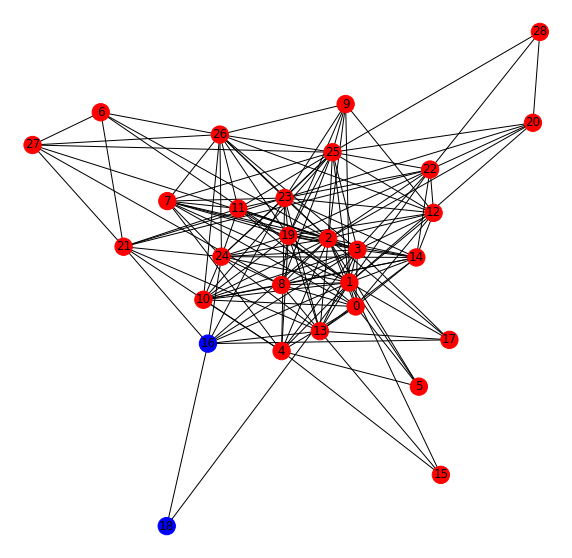

In [437]:
color=[]  # Highlight high degree nodes
for i in v[:,1]:
    if i<0:
        color.append('b')      
    else:
        color.append('r')
        
#plt.clf()
plt.figure(3,figsize=(10,10))
pos=nx.spring_layout(Gr)
nx.draw_networkx(Gr,pos,node_color = color)
plt.axis('off')
#plt.savefig('assW7_Laplacian.png')
plt.show()

## Computing Normal Laplacian Matrix and compering it the Laplacian

In [438]:
LN=nx.normalized_laplacian_matrix(Gr, nodelist=None, weight='weight')
#print(LN.todense())

In [439]:

#Determining the eigenvalues(e) and eigenvector(v)
e, v = np.linalg.eig(LN.todense()) 
#Returns the indices that would sort or order an array of eigenvalues from small to large
#because spectral clustering is all about eigenvectors belonging to small eigen valeus
order = np.argsort(e)
#This code matches value in the original array and get its location.
#Need to find the Fv,the eigenvector corresponding to the 2nd smallest eigenvalue of a graph Laplacian matrix 
# Sort the eigenvectors with respect to eigenvalues,
# The fiedler_pos variable now contains the fiedler vector position in eigenvectors.
e = e[order]
v = v[:,order]
print('eigenvalues:')
print(e)
#eigenvectors
print('eigenvectors:')
print(v)

eigenvalues:
[-2.22044605e-16  5.20411772e-01  5.76858279e-01  6.35629867e-01
  6.56242503e-01  7.35020911e-01  8.12923131e-01  8.22652716e-01
  8.66182822e-01  8.98847037e-01  9.25138800e-01  9.68876228e-01
  1.00515789e+00  1.04229795e+00  1.07857859e+00  1.10168256e+00
  1.11328712e+00  1.13638990e+00  1.17143594e+00  1.19368356e+00
  1.20146179e+00  1.22388593e+00  1.26243344e+00  1.28690487e+00
  1.30600725e+00  1.32830485e+00  1.35123118e+00  1.37564514e+00
  1.40282798e+00]
eigenvectors:
[[-2.14228196e-01  2.22772181e-01 -1.31238842e-02 -1.59528767e-01
   1.78415075e-01 -5.85768110e-02 -2.09687024e-01 -1.12871942e-01
   2.16919244e-01  2.99497208e-01 -2.07487145e-01  1.30961546e-01
   7.43518352e-02 -2.39448546e-01 -2.90988165e-01 -2.10171602e-01
  -5.41031334e-02 -9.83352260e-02  6.86741857e-02 -2.14681404e-01
   3.01200391e-01  1.23455038e-01 -2.97085009e-01 -3.67279539e-02
  -1.59561766e-01 -7.23418134e-02 -1.25075309e-01  2.81249624e-01
   1.17515582e-01]
 [-3.10834936e-01  

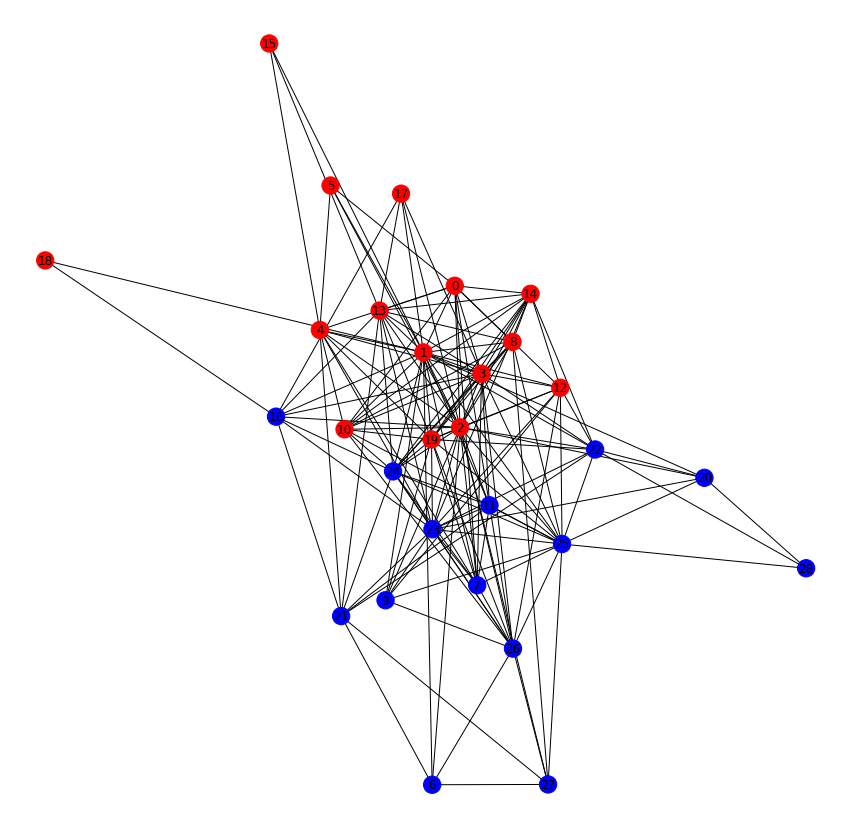

In [443]:
color=[]  # Highlight high degree nodes
for i in v[:,1]:
    if i<0:
        color.append('b')      
    else:
        color.append('r')
        
#plt.clf()
plt.figure(3,figsize=(15,15))
pos=nx.spring_layout(Gr)
nx.draw_networkx(Gr,pos,node_color = color)
plt.axis('off')
#plt.savefig('assW2_N_Laplacian.png')
plt.show()

#C1=[0,4,5,6,8,10,13,15,16,17,18,21,23,24]

In [287]:
C1=[6,7,9,11,16,20,21,22,23,24,25,26,27,28]

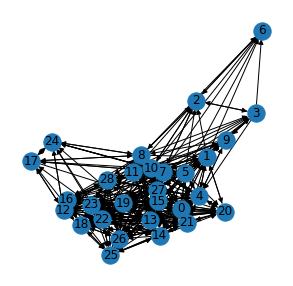

In [414]:
#Create a graph
#H=nx.read_weighted_edgelist('Grade7th.txt',create_using=nx.DiGraph) #Importing for directed graph
#nx.draw_networkx(H)
#plt.figure(3,figsize=(6,6))
#nx.draw(H, with_labels=True, node_color="lime", font_color="red")

H=nx.read_weighted_edgelist('Grade7th.txt',create_using=nx.DiGraph) #Importing for directed graph
plt.figure(3,figsize=(5,5))
nx.draw_networkx(H)
plt.axis('off')
plt.savefig('Main_directed.png')
plt.show()

<Figure size 432x288 with 0 Axes>

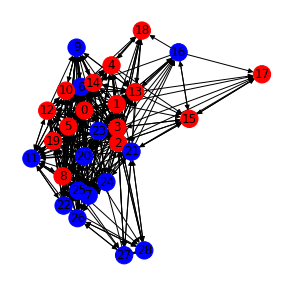

In [449]:
H=nx.read_weighted_edgelist('Grade7th.txt',create_using=nx.DiGraph) #Importing for directed graph
A=nx.to_numpy_matrix(H)
H=nx.from_numpy_matrix(A,create_using=nx.DiGraph)
n=len(A)


pos=nx.spring_layout(H) 
#C1=[0,3,5,7,9,10,11,12,19,22,23,24,25,26]#W2
#C1=[5,7,8,9,10,11,12,19,20,22,23,24,25]#W3
#C1=[0,1,2,3,4,7,13,14,15,16,18,21,23,24,26,27,28]#w4
#C1=[0,4,5,6,8,10,13,15,16,17,18,21,23,24]#W5
#C1=[0,2,3,5,6,7,8,9,10,11,12,19,20,22,25,26,27,28]#W6
C1=[6,7,9,11,16,20,21,22,23,24,25,26,27,28]#W7


color=[]  # Highlight high degree nodes
for i in range(n):
    if i in C1:
        color.append('b')
    else:
        color.append('r')
        
plt.clf()
plt.figure(3,figsize=(5,5))
nx.draw_networkx(H,pos,node_color = color)
plt.axis('off')
plt.savefig('ass(W7e-DIRECTED).png')
plt.show()